In [1]:
#one hot encoding package
from sklearn.preprocessing import OneHotEncoder

#linear_model for logit regression from sklearn
from sklearn import linear_model

#numpy, pandas for data manipulation
import numpy as np
import pandas as pd

#MySQL connectivity
import mysql.connector as sql

#import sympy for formulaic expression of log-odds ratios, e.g., to produce % success rates from coefficients of logit reg
import sympy
from sympy.solvers import solve
from sympy import Symbol

# importing the requests library
import requests 
import json
import os

#yaml package for cred import
import yaml

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
#os.chdir("/db")
os.getcwd()

'C:\\Users\\goyetc\\mlb-machine-learning'

In [5]:
#Note: this is a pandas option to omit the warning that we are performing chained indexing. While one should be careful to avoid
#doing so when unintended (as can produce incorrect results), here we use this approach because .loc method seemed to cause errors in part of the script. If strange results are obtained at some point and no other cause can be identified, this should be revisited. 
#http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
pd.set_option('mode.chained_assignment', None)

In [6]:
#legacy pull from csv
df_csv = pd.read_csv("MLB_90d_raw.csv", encoding = "utf-8-sig").dropna(axis=0)
#df_csv.head()

In [7]:
df_csv.head()

,Unnamed: 0,row_names,des,tfs,tfs_zulu,date,end_speed,pitch_type,count,zone,pitcher,batter,p_throws,stand,inning_side,hitter_val,hv_binary,ptz
0,0,1,Ball,3852,2017-04-03T00:38:52Z,2017-04-02,86.1,FF,0-0,12,593372.0,656941.0,R,L,top,0.250000,0.0,FF_12
1,1,2,Foul,3906,2017-04-03T00:39:06Z,2017-04-02,87.7,SI,1-0,7,593372.0,656941.0,R,L,top,-0.333333,1.0,SI_7
2,2,3,Ball,3926,2017-04-03T00:39:26Z,2017-04-02,89.0,SI,1-1,13,593372.0,656941.0,R,L,top,0.250000,0.0,SI_13
3,3,4,"In play, no out",3943,2017-04-03T00:39:43Z,2017-04-02,77.9,SL,2-1,8,593372.0,656941.0,R,L,top,2.500000,0.0,SL_8
4,4,5,Called Strike,4031,2017-04-03T00:40:31Z,2017-04-02,89.5,SI,0-0,9,593372.0,592178.0,R,R,top,-0.333333,1.0,SI_9


In [156]:
df_csv.loc[df_csv.batter == 596059]

,Unnamed: 0,row_names,des,tfs,tfs_zulu,date,end_speed,pitch_type,count,zone,pitcher,batter,p_throws,stand,inning_side,hitter_val,hv_binary,ptz
1530,1530,619,Called Strike,234029,2017-04-03T23:40:29Z,2017-04-03,85.1,SI,0-0,4,446372.0,596059.0,R,L,bottom,-0.333333,1.0,SI_4
1531,1531,620,Called Strike,234047,2017-04-03T23:40:47Z,2017-04-03,84.2,SL,0-1,12,446372.0,596059.0,R,L,bottom,-0.333333,1.0,SL_12
1532,1532,621,Ball,234112,2017-04-03T23:41:12Z,2017-04-03,81.5,SL,0-2,11,446372.0,596059.0,R,L,bottom,0.250000,0.0,SL_11
1533,1533,622,Foul,234133,2017-04-03T23:41:33Z,2017-04-03,78.0,CU,1-2,6,446372.0,596059.0,R,L,bottom,-0.333333,1.0,CU_6
1534,1534,623,Ball,234203,2017-04-03T23:42:03Z,2017-04-03,84.8,SI,1-2,11,446372.0,596059.0,R,L,bottom,0.250000,0.0,SI_11
1535,1535,624,Ball,234223,2017-04-03T23:42:23Z,2017-04-03,85.3,FF,2-2,11,446372.0,596059.0,R,L,bottom,0.250000,0.0,FF_11
1536,1536,625,"In play, run(s)",234242,2017-04-03T23:42:42Z,2017-04-03,83.5,SI,3-2,2,446372.0,596059.0,R,L,bottom,4.500000,0.0,SI_2
1578,1578,667,"In play, run(s)",936,2017-04-04T00:09:36Z,2017-04-03,82.4,SI,0-0,4,446372.0,596059.0,R,L,bottom,3.000000,0.0,SI_4
1663,1663,752,Ball,10257,2017-04-04T01:02:57Z,2017-04-03,79.9,CU,0-0,11,446372.0,596059.0,R,L,bottom,0.250000,0.0,CU_11
1664,1664,753,Ball,10317,2017-04-04T01:03:17Z,2017-04-03,74.8,CH,1-0,11,446372.0,596059.0,R,L,bottom,0.250000,0.0,CH_11


In [8]:
df_csv['hv_binary'].loc[df_csv.batter == 502239].unique().size

2

In [10]:
#batter_count = df_csv[['batter','tfs','p_throws']].groupby(['batter','p_throws']).agg(['count'])
batter_count = df_csv.groupby(['batter','p_throws']).size().reset_index(name='counts')

In [11]:
batter_count.head()

,batter,p_throws,counts
0,112526.0,R,48
1,134181.0,L,91
2,134181.0,R,378
3,136860.0,L,248
4,136860.0,R,887


In [12]:
batter_count.loc[batter_count.batter == 596059]

,batter,p_throws,counts
1117,596059.0,L,292
1118,596059.0,R,925


In [13]:
batter_count.loc[batter_count.batter == 502239]

,batter,p_throws,counts
493,502239.0,L,9
494,502239.0,R,33


In [14]:
batter_count.sort_values(by=['counts'], ascending = True)

,batter,p_throws,counts
458,502004.0,L,1
893,572000.0,L,1
91,434628.0,L,1
941,573186.0,L,1
943,573244.0,R,1
977,592230.0,L,1
358,474463.0,L,1
565,518748.0,L,1
688,543219.0,R,1
1193,605538.0,L,1


In [15]:
batter_count.batter.unique().size

790

In [16]:
RHP_90d = batter_count.loc[batter_count['p_throws'] == 'R'].drop(columns=['p_throws'])
LHP_90d = batter_count.loc[batter_count['p_throws'] == 'L'].drop(columns=['p_throws'])

In [17]:
RHP_90d.shape, LHP_90d.shape

((769, 2), (670, 2))

In [21]:
print('{0:.0f}% of batters saw a RHP.'.format(100*769./790.)),
print('{0:.0f}% of batters who saw a LHP.'.format(100*670./790.)),
print('{0:.0f}% of batters who saw a RHP, also saw a LHP in this time frame.'.format(100*670./769.))

97% of batters saw a RHP.
85% of batters who saw a LHP.
87% of batters who saw a RHP, also saw a LHP in this time frame.


In [22]:
RHP_90d['counts'].describe(), LHP_90d['counts'].describe()

(count     769.000000
 mean      349.933680
 std       353.108775
 min         1.000000
 25%        29.000000
 50%       199.000000
 75%       662.000000
 max      1189.000000
 Name: counts, dtype: float64, count    670.000000
 mean     135.256716
 std      120.812545
 min        1.000000
 25%       22.000000
 50%      104.500000
 75%      233.750000
 max      531.000000
 Name: counts, dtype: float64)

In [25]:
RHP_90d.head()

,batter,counts
0,112526.0,48
2,134181.0,378
4,136860.0,887
6,150029.0,724
8,276520.0,62


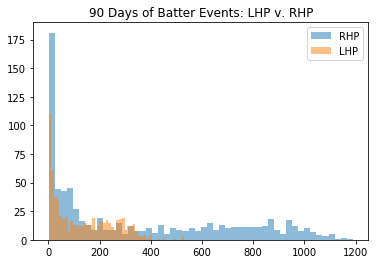

In [23]:
#fig, hist = plt.subplots(1, 2, sharex = True)
bins = 50
plt.hist(RHP_90d['counts'], bins, alpha = 0.5, label = 'RHP')
plt.hist(LHP_90d['counts'], bins, alpha = 0.5, label = 'LHP')
plt.legend(loc='upper right')
plt.title('90 Days of Batter Events: LHP v. RHP')
plt.show()

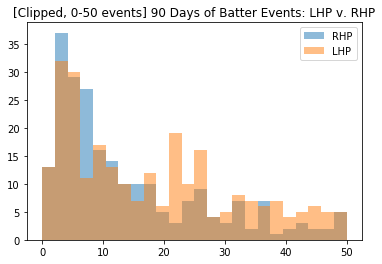

In [24]:
#fig, hist = plt.subplots(1, 2, sharex = True)
bins = np.linspace(0,50,25) 
plt.hist(RHP_90d['counts'], bins, alpha = 0.5, label = 'RHP')
plt.hist(LHP_90d['counts'], bins, alpha = 0.5, label = 'LHP')
plt.legend(loc='upper right')
plt.title('[Clipped, 0-50 events] 90 Days of Batter Events: LHP v. RHP')
plt.show()

#### Summary/Notes, raw data 
- Median # of pitches for batters against RHP in 90 days? 199
- Heavily skew right, aka high density at low event counts
- E.g., 25% is 29 events

##### LHP Notes
- Even more right skew.. note median event count of 104, max of 531 (vs 1189 v. RHP)

##### Thoughts for model
- consider "minimum" event count at 25%, e.g., 22 and 29. 
- this likely will not produce good results.. revisit

In [28]:
batters = df_csv['batter'].unique().tolist()

In [191]:
len(batters)

790

In [170]:
test = []
for i in batters[110:120]:
    test.append(i)
    print(i)

460576.0
425783.0
608577.0
435063.0
608070.0
543228.0
571980.0
596059.0
518960.0
608336.0


In [ ]:
596059

In [29]:
sample = np.random.choice(batters, 50)

In [30]:
len(sample)

50

In [64]:
def main():
    
    print("PREPARE TO MEET YOUR PITCHER'S FRIEND")
    print("...")
    print("..")
    print(".")
    print(" ")
    
    #open MySQL connection, pull data, close connection
    #db_con = sql.connect(host = mlb_host, database = mlb_db, user = mlb_db_user, password = mlb_db_pwd)
    #dataframe = pd.read_sql('SELECT pitcher, batter, p_throws, stand, hv_binary, ptz FROM rawdata_ML LIMIT 200000', con=db_con)
    #db_con.close()
    
    #clean data
    df = clean_data(df_csv)
    
    #define batters of interest by batter ID
    #batters_of_interest = [514888,453568,457759,519317,458015,547180,641355,592450,545361,457705,502671,518626,502517,518934,471865,592178,519346]
    batters_of_interest = batters
    #batters_of_interest = sample
    #batters_of_interest = [502239]
    
    #run model on var & batters of interest from current data
    return hv_model(['ptz','hv_binary'],batters_of_interest,df)

def clean_data(data):
    #clean data.. drop N/A, duplicate rows, observe shape
    data.dropna(axis=0)
    data=data.drop_duplicates()
    #df_input.shape
    
    #format pitcher, batter, hv_binary as int
    data[['pitcher','batter','hv_binary']] = data[['pitcher','batter','hv_binary']].astype(int)
    #df.dtypes
    
    return data

def hv_model(features,batters_list,data):
    #main modeling script.. needs to be broken up into smaller functions at some point in the future
    
    #empty dictionary for findings, count to track batter-specific model run #
    global findingsDict
    findingsDict = {}
    
    global analysisDict
    analysisDict = {}
    
    count = 0 
    
    #identify pitcher handedness. Like Jason has yet to see my ambidextrosity, we have yet to see anything more than "L" or "R", but we prefer this method to hard coding :P
    P_throws = data.p_throws.unique()

    #generate results for each batter in list
    for batter_id in batters_list:
        
        #per run (for each batter ID), produce two model results- against left handed pitchers and right handed pitchers
        #note these lists are cleared/recreated for *each* batter_id by nature of their creation within the for loop
        RHPfindingslist = list()
        LHPfindingslist = list()
        
        #status by model run/batter n of N batters, n:{1,N}
        print("")
        count += 1
        print("Run #:"+str(count))
        print("")
        #print('Batter ID:', batter_id)
        
        #Separating right handed pitcher results from LHP results
        for hand in P_throws:
            
            records = data[(data.batter == batter_id) & (data.p_throws == hand)]
            num_events = len(records.index)
            print("")
            print("Batter ID: %s" % (batter_id))
            print("Pitcher-handedness:", hand)
            print("number of events:", num_events)
            print("")
            
            print(records.hv_binary.unique().size)
            
            #prevent batters with too few records from being used
            if num_events >= 30 and records.hv_binary.unique().size == 2:
    
                #select features to incorporate into model based on input argument
                var_interest = records[features]

                #ptz variable (pitch_zone combo) is categorical, prep for encoding
                if 'ptz' in var_interest:
                    var_interest.ptz = var_interest.ptz.astype(object)   
                else:
                    pass

                #label space Y: binary representation of hitter_val: if hv <0, 1; else, 0. 
                Y = var_interest[['hv_binary']]
                #print("Y.size:", Y.shape)

                #feature space X: drop labels in 'hv_binary'
                X = var_interest.drop(['hv_binary'], axis = 1)
                #print("X.size:", X.shape)

                #Create count_type var (ahead, behind, even) if including in model
                if 'count' in var_interest:
                    X['Balls'] = X['count'].apply(lambda x: x[:1])
                    X['Strikes'] = X['count'].apply(lambda x: x[-1:])

                    conditions = [(X['Balls'] > X['Strikes']), (X['Balls'] < X['Strikes'])]
                    choices = ['Behind', 'Ahead']
                    X['Count_type'] = np.select(conditions, choices, default='Even')

                    zone = X['zone'].to_frame()

                    #Drop unneeded columns
                    X = X.drop(['count','Balls','Strikes'], axis = 1)

                else:
                    pass

                #Create one_hot encoded predictor array for logistic regression
                X_hot = pd.get_dummies(X)
                #print("X_hot.size:", X_hot.shape)
                
                #create train/test splits
                X_train, X_test, y_train, y_test = train_test_split(X_hot, Y, test_size=0.25, random_state=42)

                #Logistic regression model, initialize function from sklearn
                logit_reg = linear_model.LogisticRegression(random_state = 42)

                #linear regression on one-hot encoded data X and Y HVAL labels
                model = logit_reg.fit(X_train, y_train.values.ravel())

                #Average success, from pitcher's perspective.  Note that this is just the baseline likelihood of predicting the correct outcome by chance. We compare our model accuracy to this value.
                avg_success=y_train.mean().values[0]

                #Baseline pitcher success rate
                #print("Random %s-handed pitcher's baseline success ratio against hitter:" % (hand, , Y.mean())
                if hand == 'R':
                        RHPfindingslist.append(("Based on the last 90 days' worth of pitches against this batter, %s-handed pitchers have a %s success rate." % (hand,"{0:.0f}%".format(avg_success* 100))))
                elif hand == 'L':
                        LHPfindingslist.append(("Based on the last 90 days' worth of pitches against this batter, %s-handed pitchers have a %s success rate." % (hand,"{0:.0f}%".format(avg_success* 100))))
                else:
                    pass

                #logistic regression results
                Results = pd.DataFrame(list(zip(X_hot.columns, np.transpose(model.coef_), np.transpose(np.exp(model.coef_)), abs(np.transpose(np.exp(model.coef_)-1)))))
                Results.columns = ['Recommendation', 'LR_coeff/Log_Odds', 'Odds_Ratio', 'Abs_Odds_Ratio_-1']

                #sorted results
                Results = Results.sort_values(by='Abs_Odds_Ratio_-1', ascending = False)
                Top_5 = Results[['Recommendation','Odds_Ratio']][:5]
                Top_5.Odds_Ratio = Top_5.Odds_Ratio.astype(float)


                #Use sympy to translate logistic regression coefficients into odds ratio, e.g., improved odds of success of choosing this feature
                x = Symbol('x')

                for index,row in Top_5.iterrows():

                    #log-odds ratio calc
                    Top_5.loc[index,'New_Odds'] = solve(Top_5.loc[index,'Odds_Ratio']-((x/(1-x))/(Y.mean()/(1-Y.mean()))), x)

                #string formatting
                Top_5['New_Odds']= Top_5['New_Odds'].str.get(0)
                #print(Top_5['New_Odds'], Top_5['Odds_Ratio'])

                #Creating new series pt:pitch_type and zc:zone_catcher, e.g., zone from catcher's perspective
                #Credit to Benita!
                s= Top_5['Recommendation'].apply(lambda x: x.split('_'))
                Top_5['pt'] = s.apply(lambda x: x[1])
                Top_5['zc'] = s.apply(lambda x: x[2])

                #Translation of codes to descriptive terms: pitch type
                def applyFunc(s):
                    if s == 'FF':
                        return 'four-seam fastball'
                    elif s == 'SI':
                        return 'sinker'
                    elif s == 'SL':
                        return 'slider'
                    elif s == 'KN':
                        return 'knuckleball'
                    elif s == 'CH':
                        return 'change-up'
                    elif s == 'CU':
                        return 'curve-ball'
                    elif s == 'FT':
                        return 'two-seam fastball'
                    return ''

                #create series of descriptive pitch type: zones
                Top_5['pitch_descrip'] = Top_5['pt'].apply(applyFunc)

                def applyFunc2(s):
                    if s == '1':
                        return 'to the top right'
                    elif s == '2':
                        return 'top center'
                    elif s == '3':
                        return 'to the top left'
                    elif s == '4':
                        return 'center right'
                    elif s == '5':
                        return 'down the middle'
                    elif s == '6':
                        return 'center left'
                    elif s == '7':
                        return 'to the bottom right'
                    elif s == '8':
                        return 'bottom center'
                    elif s == '9':
                        return 'to the bottom left'
                    elif s == '10':
                        return 'into outer space'
                    elif s == '11':
                        return 'upper right of strike zone'
                    elif s == '12':
                        return 'upper left of strike zone'
                    elif s == '13':
                        return 'bottom right of strike zone'
                    elif s == '14':
                        return 'bottom left of strike zone'
                    return ''

                #create series to describe zones, mirroring to be seen from pitcher's perspective
                Top_5['zone_descrip'] = Top_5['zc'].apply(applyFunc2)    

                #Print the results!
                print("Based on the last 90 days' worth of pitches against this batter, %s-handed pitchers have a %s success rate." % (hand,"{0:.0f}%".format(avg_success* 100)))
                print("")
                
                model_score = model.score(X_test, y_test)

                for index,row in Top_5.iterrows():
                    print("Throw a %s %s for a success rate of %s." % (Top_5.loc[index,'pitch_descrip'], Top_5.loc[index, 'zone_descrip'], "{0:.0f}%".format(Top_5.loc[index,'New_Odds'] * 100)))

                    if hand == 'R':
                        RHPfindingslist.append("Throw a %s %s for a success rate of %s." % (Top_5.loc[index,'pitch_descrip'], Top_5.loc[index, 'zone_descrip'], "{0:.0f}%".format(Top_5.loc[index,'New_Odds'] * 100)))
                        
                    elif hand == 'L':
                        LHPfindingslist.append("Throw a %s %s for a success rate of %s." % (Top_5.loc[index,'pitch_descrip'], Top_5.loc[index, 'zone_descrip'], "{0:.0f}%".format(Top_5.loc[index,'New_Odds'] * 100)))
                        
                    else:
                        pass

                print("")
                print("Note: Model Accuracy, based on %s pitches:" % num_events, "{0:.0%}".format(model_score))
                print("")
        
                try:
                    if hand == 'R':
                        analysisDict[batter_id] = {'num_events-R': num_events, 'model_score-R': model_score}
                    else:
                        analysisDict[batter_id].update({'num_events-L': num_events, 'model_score-L': model_score})
                except:
                    pass
        
            else:
                print("Not enough pitches made to this batter by {}-handed pitchers, or all events have same outcome".format(hand))
                continue
           
        print("")
        print("HOORAY!")
        print("")

        #Note- this is dictionary containing findings results per pitcher. 
        findingsDict[batter_id] = {'left_hand_pitcher_findings': LHPfindingslist, 'right_hand_pitcher_findings': RHPfindingslist}

        # api-endpoint
        #URL = 'http://mlb-player-api.cfapps.io/player/%d/insight' % (batter_id)
        #URL = 'http://mlb-api.cfapps.io/player/%d/insight' % (batter_id)
        #try:
        #    r = requests.post(url = URL, json = findingsDict[batter_id])
        #    print("HTTP status code: "+str(r.status_code))
        #    r.raise_for_status()
        #except requests.exceptions.HTTPError as err:
        #    print(err)
        
    return("")


In [65]:
if __name__ == "__main__":   
    
    main()

PREPARE TO MEET YOUR PITCHER'S FRIEND
...
..
.
 

Run #:1


Batter ID: 656941.0
Pitcher-handedness: R
number of events: 869

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 56% success rate.

Throw a four-seam fastball center left for a success rate of 84%.
Throw a four-seam fastball down the middle for a success rate of 83%.
Throw a four-seam fastball to the top right for a success rate of 82%.
Throw a sinker to the bottom right for a success rate of 81%.
Throw a four-seam fastball top center for a success rate of 77%.

Note: Model Accuracy, based on 869 pitches: 70%


Batter ID: 656941.0
Pitcher-handedness: L
number of events: 286

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 57% success rate.

Throw a four-seam fastball center right for a success rate of 80%.
Throw a four-seam fastball top center for a success rate of 78%.
Throw a four-seam fastball to the top right for a success rate of 75%.


Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 59% success rate.

Throw a four-seam fastball down the middle for a success rate of 80%.
Throw a curve-ball to the bottom left for a success rate of 76%.
Throw a four-seam fastball bottom center for a success rate of 76%.
Throw a four-seam fastball center left for a success rate of 72%.
Throw a slider down the middle for a success rate of 72%.

Note: Model Accuracy, based on 88 pitches: 77%


HOORAY!


Run #:9


Batter ID: 608365.0
Pitcher-handedness: R
number of events: 740

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a slider to the bottom left for a success rate of 83%.
Throw a four-seam fastball to the bottom left for a success rate of 83%.
Throw a four-seam fastball center left for a success rate of 81%.
Throw a four-seam fastball to the top left for a success rate of 79%.
Throw a four-seam fastball to the top right for 

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 68% success rate.

Throw a slider center left for a success rate of 82%.
Throw a four-seam fastball center left for a success rate of 80%.
Throw a sinker bottom left of strike zone for a success rate of 46%.
Throw a four-seam fastball upper left of strike zone for a success rate of 47%.
Throw a four-seam fastball to the bottom right for a success rate of 77%.

Note: Model Accuracy, based on 80 pitches: 75%


Batter ID: 593372.0
Pitcher-handedness: L
number of events: 23

2
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:17


Batter ID: 452657.0
Pitcher-handedness: R
number of events: 92

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 61% success rate.

Throw a four-seam fastball down the middle for a success rate of 79%.
Throw a four-seam fastball to the top right for a success rate of 74%.
T

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 52% success rate.

Throw a four-seam fastball top center for a success rate of 83%.
Throw a four-seam fastball bottom center for a success rate of 83%.
Throw a four-seam fastball to the top right for a success rate of 82%.
Throw a four-seam fastball to the bottom right for a success rate of 79%.
Throw a four-seam fastball center right for a success rate of 78%.

Note: Model Accuracy, based on 1106 pitches: 68%


Batter ID: 458731.0
Pitcher-handedness: L
number of events: 285

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 57% success rate.

Throw a sinker center right for a success rate of 76%.
Throw a four-seam fastball center right for a success rate of 74%.
Throw a four-seam fastball to the top right for a success rate of 74%.
Throw a four-seam fastball center left for a success rate of 74%.
Throw a four-seam fastball to the top left for a success ra

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 52% success rate.

Throw a four-seam fastball top center for a success rate of 84%.
Throw a four-seam fastball to the top right for a success rate of 83%.
Throw a four-seam fastball to the top left for a success rate of 83%.
Throw a four-seam fastball center left for a success rate of 79%.
Throw a sinker bottom center for a success rate of 78%.

Note: Model Accuracy, based on 938 pitches: 72%


Batter ID: 519306.0
Pitcher-handedness: L
number of events: 383

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 50% success rate.

Throw a slider down the middle for a success rate of 74%.
Throw a four-seam fastball down the middle for a success rate of 74%.
Throw a four-seam fastball to the bottom left for a success rate of 71%.
Throw a sinker center right for a success rate of 71%.
Throw a sinker top center for a success rate of 71%.

Note: Model Accuracy, base

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 48% success rate.

Throw a four-seam fastball center left for a success rate of 69%.
Throw a sinker bottom center for a success rate of 69%.
Throw a four-seam fastball to the top right for a success rate of 66%.
Throw a sinker to the bottom left for a success rate of 66%.
Throw a four-seam fastball to the bottom right for a success rate of 66%.

Note: Model Accuracy, based on 340 pitches: 73%


HOORAY!


Run #:40


Batter ID: 591720.0
Pitcher-handedness: R
number of events: 433

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 58% success rate.

Throw a four-seam fastball to the top left for a success rate of 83%.
Throw a sinker center left for a success rate of 77%.
Throw a four-seam fastball to the bottom left for a success rate of 77%.
Throw a sinker to the top right for a success rate of 77%.
Throw a curve-ball center left for a success rate of 77%.



Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 54% success rate.

Throw a four-seam fastball center right for a success rate of 81%.
Throw a sinker to the bottom left for a success rate of 78%.
Throw a sinker to the bottom right for a success rate of 77%.
Throw a four-seam fastball bottom center for a success rate of 76%.
Throw a sinker down the middle for a success rate of 74%.

Note: Model Accuracy, based on 759 pitches: 75%


Batter ID: 457763.0
Pitcher-handedness: L
number of events: 309

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 47% success rate.

Throw a four-seam fastball to the bottom left for a success rate of 70%.
Throw a change-up bottom center for a success rate of 67%.
Throw a sinker bottom center for a success rate of 67%.
Throw a sinker down the middle for a success rate of 67%.
Throw a four-seam fastball center right for a success rate of 67%.

Note: Model Accuracy, based on 309

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 50% success rate.

Throw a four-seam fastball center right for a success rate of 81%.
Throw a four-seam fastball to the bottom right for a success rate of 79%.
Throw a sinker center left for a success rate of 76%.
Throw a slider center right for a success rate of 74%.
Throw a four-seam fastball to the top right for a success rate of 73%.

Note: Model Accuracy, based on 1060 pitches: 71%


Batter ID: 571875.0
Pitcher-handedness: L
number of events: 284

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 60% success rate.

Throw a four-seam fastball center right for a success rate of 82%.
Throw a four-seam fastball bottom center for a success rate of 82%.
Throw a slider to the bottom right for a success rate of 78%.
Throw a sinker down the middle for a success rate of 76%.
Throw a sinker to the bottom right for a success rate of 74%.

Note: Model Accuracy, ba

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 50% success rate.

Throw a change-up center left for a success rate of 77%.
Throw a change-up bottom center for a success rate of 74%.
Throw a change-up to the bottom left for a success rate of 74%.
Throw a four-seam fastball center right for a success rate of 71%.
Throw a four-seam fastball to the top right for a success rate of 67%.

Note: Model Accuracy, based on 191 pitches: 69%


HOORAY!


Run #:64


Batter ID: 455104.0
Pitcher-handedness: R
number of events: 421

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a sinker center left for a success rate of 78%.
Throw a four-seam fastball down the middle for a success rate of 78%.
Throw a sinker to the top right for a success rate of 77%.
Throw a slider center left for a success rate of 75%.
Throw a slider to the bottom left for a success rate of 74%.

Note: Model Accuracy, base

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 59% success rate.

Throw a four-seam fastball to the top left for a success rate of 80%.
Throw a four-seam fastball to the top right for a success rate of 76%.
Throw a sinker down the middle for a success rate of 74%.
Throw a sinker to the bottom left for a success rate of 72%.
Throw a sinker center left for a success rate of 72%.

Note: Model Accuracy, based on 222 pitches: 66%


HOORAY!


Run #:72


Batter ID: 459964.0
Pitcher-handedness: R
number of events: 1070

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 53% success rate.

Throw a four-seam fastball center right for a success rate of 86%.
Throw a four-seam fastball bottom center for a success rate of 80%.
Throw a change-up bottom center for a success rate of 80%.
Throw a four-seam fastball to the top right for a success rate of 77%.
Throw a curve-ball to the top right for a success rate of 76%.


Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 55% success rate.

Throw a sinker center right for a success rate of 83%.
Throw a slider center right for a success rate of 78%.
Throw a sinker down the middle for a success rate of 78%.
Throw a change-up bottom center for a success rate of 76%.
Throw a four-seam fastball to the top left for a success rate of 74%.

Note: Model Accuracy, based on 668 pitches: 68%


Batter ID: 519390.0
Pitcher-handedness: L
number of events: 73

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 65% success rate.

Throw a sinker upper left of strike zone for a success rate of 76%.
Throw a four-seam fastball to the top right for a success rate of 76%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 27%.
Throw a knuckleball bottom right of strike zone for a success rate of 41%.
Throw a four-seam fastball to the bottom right for a success rate of 73%

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 65% success rate.

Throw a four-seam fastball center right for a success rate of 82%.
Throw a four-seam fastball bottom center for a success rate of 81%.
Throw a four-seam fastball center left for a success rate of 79%.
Throw a four-seam fastball to the top left for a success rate of 79%.
Throw a slider to the top right for a success rate of 77%.

Note: Model Accuracy, based on 203 pitches: 69%


HOORAY!


Run #:87


Batter ID: 621020.0
Pitcher-handedness: R
number of events: 1015

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a slider bottom center for a success rate of 84%.
Throw a four-seam fastball to the top left for a success rate of 84%.
Throw a four-seam fastball center left for a success rate of 83%.
Throw a slider to the top left for a success rate of 80%.
Throw a curve-ball bottom center for a success rate of 79%.

N

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 54% success rate.

Throw a sinker to the bottom left for a success rate of 79%.
Throw a four-seam fastball to the bottom right for a success rate of 79%.
Throw a four-seam fastball to the top left for a success rate of 79%.
Throw a change-up bottom center for a success rate of 79%.
Throw a curve-ball center right for a success rate of 75%.

Note: Model Accuracy, based on 1105 pitches: 67%


Batter ID: 455976.0
Pitcher-handedness: L
number of events: 236

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 58% success rate.

Throw a four-seam fastball down the middle for a success rate of 79%.
Throw a four-seam fastball top center for a success rate of 77%.
Throw a slider to the bottom right for a success rate of 77%.
Throw a sinker center left for a success rate of 77%.
Throw a four-seam fastball to the bottom right for a success rate of 76%.

Note: Model Ac

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 52% success rate.

Throw a four-seam fastball center left for a success rate of 69%.
Throw a slider upper left of strike zone for a success rate of 65%.
Throw a sinker center left for a success rate of 65%.
Throw a four-seam fastball top center for a success rate of 65%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 24%.

Note: Model Accuracy, based on 87 pitches: 59%


HOORAY!


Run #:102


Batter ID: 527054.0
Pitcher-handedness: R
number of events: 95

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 62% success rate.

Throw a sinker to the top left for a success rate of 76%.
Throw a sinker bottom left of strike zone for a success rate of 29%.
Throw a change-up upper right of strike zone for a success rate of 73%.
Throw a four-seam fastball to the top right for a success rate of 73%.
Throw a sinker bottom right of strike z

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 51% success rate.

Throw a change-up bottom left of strike zone for a success rate of 76%.
Throw a slider bottom center for a success rate of 74%.
Throw a sinker center right for a success rate of 74%.
Throw a slider center right for a success rate of 72%.
Throw a four-seam fastball to the bottom right for a success rate of 69%.

Note: Model Accuracy, based on 327 pitches: 67%


HOORAY!


Run #:110


Batter ID: 429665.0
Pitcher-handedness: R
number of events: 891

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 54% success rate.

Throw a four-seam fastball center right for a success rate of 86%.
Throw a slider center left for a success rate of 82%.
Throw a sinker down the middle for a success rate of 79%.
Throw a four-seam fastball center left for a success rate of 74%.
Throw a four-seam fastball to the top left for a success rate of 73%.

Note: Model Ac

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 56% success rate.

Throw a sinker center left for a success rate of 71%.
Throw a curve-ball bottom left of strike zone for a success rate of 67%.
Throw a four-seam fastball to the top right for a success rate of 67%.
Throw a four-seam fastball upper right of strike zone for a success rate of 67%.
Throw a change-up bottom right of strike zone for a success rate of 33%.

Note: Model Accuracy, based on 74 pitches: 58%


Batter ID: 571980.0
Pitcher-handedness: L
number of events: 0

0
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:118


Batter ID: 596059.0
Pitcher-handedness: R
number of events: 925

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 60% success rate.

Throw a change-up to the bottom right for a success rate of 86%.
Throw a four-seam fastball to the top left for a success rate of 85

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 55% success rate.

Throw a slider to the bottom right for a success rate of 80%.
Throw a slider center right for a success rate of 79%.
Throw a four-seam fastball to the top right for a success rate of 78%.
Throw a sinker to the bottom right for a success rate of 78%.
Throw a slider down the middle for a success rate of 77%.

Note: Model Accuracy, based on 972 pitches: 67%


Batter ID: 453568.0
Pitcher-handedness: L
number of events: 531

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 59% success rate.

Throw a four-seam fastball center right for a success rate of 84%.
Throw a four-seam fastball bottom center for a success rate of 82%.
Throw a slider to the bottom right for a success rate of 80%.
Throw a four-seam fastball to the bottom right for a success rate of 80%.
Throw a slider upper right of strike zone for a success rate of 78%.

Note: Model Acc

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 54% success rate.

Throw a four-seam fastball down the middle for a success rate of 74%.
Throw a four-seam fastball center left for a success rate of 74%.
Throw a slider bottom center for a success rate of 74%.
Throw a four-seam fastball to the top left for a success rate of 74%.
Throw a four-seam fastball center right for a success rate of 74%.

Note: Model Accuracy, based on 310 pitches: 64%


HOORAY!


Run #:133


Batter ID: 467827.0
Pitcher-handedness: R
number of events: 412

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 56% success rate.

Throw a four-seam fastball top center for a success rate of 80%.
Throw a four-seam fastball to the bottom right for a success rate of 79%.
Throw a change-up bottom center for a success rate of 77%.
Throw a knuckleball bottom left of strike zone for a success rate of 75%.
Throw a sinker to the top left for a succ

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 61% success rate.

Throw a slider center right for a success rate of 82%.
Throw a slider center left for a success rate of 80%.
Throw a four-seam fastball down the middle for a success rate of 79%.
Throw a curve-ball center right for a success rate of 77%.
Throw a four-seam fastball center left for a success rate of 76%.

Note: Model Accuracy, based on 757 pitches: 63%


Batter ID: 606115.0
Pitcher-handedness: L
number of events: 241

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 60% success rate.

Throw a four-seam fastball center right for a success rate of 79%.
Throw a four-seam fastball center left for a success rate of 77%.
Throw a four-seam fastball to the top right for a success rate of 77%.
Throw a sinker down the middle for a success rate of 74%.
Throw a slider to the bottom right for a success rate of 74%.

Note: Model Accuracy, based on 241 

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 59% success rate.

Throw a four-seam fastball center right for a success rate of 82%.
Throw a slider center left for a success rate of 81%.
Throw a sinker top center for a success rate of 81%.
Throw a four-seam fastball bottom center for a success rate of 81%.
Throw a sinker center left for a success rate of 81%.

Note: Model Accuracy, based on 878 pitches: 62%


Batter ID: 519058.0
Pitcher-handedness: L
number of events: 293

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 58% success rate.

Throw a sinker center left for a success rate of 79%.
Throw a slider to the bottom right for a success rate of 77%.
Throw a curve-ball center left for a success rate of 75%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 28%.
Throw a slider bottom center for a success rate of 72%.

Note: Model Accuracy, based on 293 pitches: 73%


HOORA

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 57% success rate.

Throw a four-seam fastball to the bottom right for a success rate of 74%.
Throw a four-seam fastball center right for a success rate of 71%.
Throw a slider center right for a success rate of 68%.
Throw a slider bottom left of strike zone for a success rate of 68%.
Throw a four-seam fastball top center for a success rate of 68%.

Note: Model Accuracy, based on 112 pitches: 61%


HOORAY!


Run #:157


Batter ID: 449181.0
Pitcher-handedness: R
number of events: 132

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 66% success rate.

Throw a slider to the bottom left for a success rate of 82%.
Throw a sinker bottom center for a success rate of 80%.
Throw a sinker upper right of strike zone for a success rate of 32%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 35%.
Throw a four-seam fastball upper right of str

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 65% success rate.

Throw a curve-ball down the middle for a success rate of 78%.
Throw a four-seam fastball center right for a success rate of 75%.
Throw a sinker to the bottom right for a success rate of 75%.
Throw a sinker to the top left for a success rate of 75%.
Throw a sinker bottom center for a success rate of 72%.

Note: Model Accuracy, based on 132 pitches: 64%


Batter ID: 609275.0
Pitcher-handedness: L
number of events: 37

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 70% success rate.

Throw a sinker upper left of strike zone for a success rate of 52%.
Throw a change-up bottom left of strike zone for a success rate of 81%.
Throw a slider bottom left of strike zone for a success rate of 81%.
Throw a sinker center right for a success rate of 81%.
Throw a slider bottom right of strike zone for a success rate of 60%.

Note: Model Accuracy, bas

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 55% success rate.

Throw a four-seam fastball center right for a success rate of 80%.
Throw a slider to the bottom right for a success rate of 79%.
Throw a four-seam fastball down the middle for a success rate of 75%.
Throw a four-seam fastball top center for a success rate of 73%.
Throw a four-seam fastball to the bottom right for a success rate of 73%.

Note: Model Accuracy, based on 321 pitches: 57%


HOORAY!


Run #:172


Batter ID: 502517.0
Pitcher-handedness: R
number of events: 897

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 52% success rate.

Throw a four-seam fastball to the top right for a success rate of 77%.
Throw a four-seam fastball to the top left for a success rate of 76%.
Throw a slider down the middle for a success rate of 74%.
Throw a four-seam fastball center left for a success rate of 74%.
Throw a slider to the top right for a s

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 57% success rate.

Throw a slider bottom right of strike zone for a success rate of 83%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 27%.
Throw a four-seam fastball down the middle for a success rate of 71%.
Throw a four-seam fastball center right for a success rate of 71%.
Throw a four-seam fastball top center for a success rate of 71%.

Note: Model Accuracy, based on 124 pitches: 65%


HOORAY!


Run #:180


Batter ID: 518618.0
Pitcher-handedness: R
number of events: 696

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 61% success rate.

Throw a four-seam fastball top center for a success rate of 86%.
Throw a four-seam fastball center left for a success rate of 85%.
Throw a four-seam fastball down the middle for a success rate of 81%.
Throw a four-seam fastball to the bottom left for a success rate of 80%.
Throw a sinker

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 50% success rate.

Throw a sinker to the top left for a success rate of 67%.
Throw a change-up bottom right of strike zone for a success rate of 67%.
Throw a slider center left for a success rate of 63%.
Throw a four-seam fastball bottom center for a success rate of 63%.
Throw a slider to the top right for a success rate of 63%.

Note: Model Accuracy, based on 164 pitches: 56%


HOORAY!


Run #:188


Batter ID: 546318.0
Pitcher-handedness: R
number of events: 934

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 59% success rate.

Throw a four-seam fastball center right for a success rate of 82%.
Throw a four-seam fastball to the top right for a success rate of 81%.
Throw a four-seam fastball to the top left for a success rate of 81%.
Throw a sinker to the top left for a success rate of 79%.
Throw a change-up center right for a success rate of 78%.

Note:

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 56% success rate.

Throw a four-seam fastball top center for a success rate of 82%.
Throw a four-seam fastball to the top right for a success rate of 80%.
Throw a slider bottom center for a success rate of 79%.
Throw a four-seam fastball to the bottom left for a success rate of 79%.
Throw a four-seam fastball down the middle for a success rate of 78%.

Note: Model Accuracy, based on 493 pitches: 67%


Batter ID: 519237.0
Pitcher-handedness: L
number of events: 287

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 53% success rate.

Throw a four-seam fastball center left for a success rate of 77%.
Throw a four-seam fastball top center for a success rate of 77%.
Throw a change-up to the bottom left for a success rate of 75%.
Throw a four-seam fastball to the top right for a success rate of 73%.
Throw a sinker center left for a success rate of 73%.

Note: Mo

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 58% success rate.

Throw a four-seam fastball center left for a success rate of 74%.
Throw a curve-ball center left for a success rate of 74%.
Throw a four-seam fastball to the top left for a success rate of 71%.
Throw a slider upper left of strike zone for a success rate of 71%.
Throw a change-up bottom center for a success rate of 71%.

Note: Model Accuracy, based on 108 pitches: 52%


HOORAY!


Run #:203


Batter ID: 444857.0
Pitcher-handedness: R
number of events: 79

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 83% success rate.

Throw a four-seam fastball upper right of strike zone for a success rate of 62%.
Throw a four-seam fastball to the bottom right for a success rate of 89%.
Throw a change-up upper right of strike zone for a success rate of 72%.
Throw a sinker bottom right of strike zone for a success rate of 74%.
Throw a four-seam fastbal

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 54% success rate.

Throw a sinker to the bottom right for a success rate of 84%.
Throw a four-seam fastball top center for a success rate of 82%.
Throw a four-seam fastball to the bottom left for a success rate of 82%.
Throw a four-seam fastball to the bottom right for a success rate of 81%.
Throw a sinker center right for a success rate of 76%.

Note: Model Accuracy, based on 990 pitches: 69%


Batter ID: 605137.0
Pitcher-handedness: L
number of events: 283

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 55% success rate.

Throw a slider bottom left of strike zone for a success rate of 75%.
Throw a change-up to the bottom left for a success rate of 75%.
Throw a four-seam fastball top center for a success rate of 75%.
Throw a four-seam fastball to the top right for a success rate of 75%.
Throw a four-seam fastball to the bottom left for a success rate o

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 67% success rate.

Throw a change-up to the bottom left for a success rate of 80%.
Throw a four-seam fastball top center for a success rate of 76%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 76%.
Throw a four-seam fastball down the middle for a success rate of 76%.
Throw a four-seam fastball to the bottom right for a success rate of 73%.

Note: Model Accuracy, based on 74 pitches: 58%


HOORAY!


Run #:218


Batter ID: 457705.0
Pitcher-handedness: R
number of events: 997

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 53% success rate.

Throw a sinker center right for a success rate of 80%.
Throw a four-seam fastball to the top left for a success rate of 77%.
Throw a sinker to the top right for a success rate of 76%.
Throw a four-seam fastball to the top right for a success rate of 76%.
Throw a slider center left for a s

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 62% success rate.

Throw a slider center left for a success rate of 82%.
Throw a four-seam fastball center left for a success rate of 82%.
Throw a four-seam fastball to the top right for a success rate of 76%.
Throw a sinker down the middle for a success rate of 75%.
Throw a change-up center right for a success rate of 74%.

Note: Model Accuracy, based on 586 pitches: 58%


Batter ID: 622534.0
Pitcher-handedness: L
number of events: 228

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 57% success rate.

Throw a four-seam fastball to the bottom left for a success rate of 76%.
Throw a four-seam fastball down the middle for a success rate of 73%.
Throw a curve-ball center left for a success rate of 73%.
Throw a slider down the middle for a success rate of 71%.
Throw a slider bottom left of strike zone for a success rate of 71%.

Note: Model Accuracy, based 

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 61% success rate.

Throw a slider center right for a success rate of 83%.
Throw a four-seam fastball bottom center for a success rate of 82%.
Throw a sinker bottom center for a success rate of 82%.
Throw a four-seam fastball to the top right for a success rate of 81%.
Throw a four-seam fastball to the top left for a success rate of 80%.

Note: Model Accuracy, based on 614 pitches: 66%


Batter ID: 595978.0
Pitcher-handedness: L
number of events: 263

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 61% success rate.

Throw a four-seam fastball to the top left for a success rate of 85%.
Throw a four-seam fastball center left for a success rate of 83%.
Throw a four-seam fastball down the middle for a success rate of 82%.
Throw a change-up bottom left of strike zone for a success rate of 76%.
Throw a four-seam fastball to the bottom right for a success rate 

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 65% success rate.

Throw a sinker down the middle for a success rate of 80%.
Throw a slider bottom right of strike zone for a success rate of 41%.
Throw a change-up bottom right of strike zone for a success rate of 78%.
Throw a four-seam fastball upper right of strike zone for a success rate of 78%.
Throw a sinker bottom right of strike zone for a success rate of 47%.

Note: Model Accuracy, based on 31 pitches: 62%


HOORAY!


Run #:241


Batter ID: 608671.0
Pitcher-handedness: R
number of events: 190

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 53% success rate.

Throw a four-seam fastball upper left of strike zone for a success rate of 76%.
Throw a four-seam fastball bottom center for a success rate of 76%.
Throw a four-seam fastball to the bottom right for a success rate of 76%.
Throw a four-seam fastball center right for a success rate of 73%.
Th

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 60% success rate.

Throw a sinker center left for a success rate of 74%.
Throw a sinker down the middle for a success rate of 74%.
Throw a sinker to the top left for a success rate of 74%.
Throw a four-seam fastball to the bottom right for a success rate of 74%.
Throw a four-seam fastball down the middle for a success rate of 73%.

Note: Model Accuracy, based on 200 pitches: 64%


HOORAY!


Run #:249


Batter ID: 516949.0
Pitcher-handedness: R
number of events: 96

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 58% success rate.

Throw a curve-ball to the bottom right for a success rate of 73%.
Throw a sinker to the bottom right for a success rate of 73%.
Throw a slider center right for a success rate of 69%.
Throw a sinker down the middle for a success rate of 69%.
Throw a four-seam fastball top center for a success rate of 69%.

Note: Model Accuracy, 

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 50% success rate.

Throw a slider to the bottom right for a success rate of 70%.
Throw a change-up center left for a success rate of 70%.
Throw a four-seam fastball center left for a success rate of 70%.
Throw a change-up to the top right for a success rate of 66%.
Throw a curve-ball center right for a success rate of 66%.

Note: Model Accuracy, based on 273 pitches: 72%


HOORAY!


Run #:257


Batter ID: 621043.0
Pitcher-handedness: R
number of events: 1052

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 52% success rate.

Throw a four-seam fastball down the middle for a success rate of 80%.
Throw a four-seam fastball to the bottom left for a success rate of 79%.
Throw a curve-ball center left for a success rate of 77%.
Throw a four-seam fastball to the bottom right for a success rate of 77%.
Throw a four-seam fastball to the top left for a success rat

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 59% success rate.

Throw a four-seam fastball top center for a success rate of 82%.
Throw a four-seam fastball center left for a success rate of 80%.
Throw a sinker to the bottom left for a success rate of 80%.
Throw a four-seam fastball to the bottom left for a success rate of 78%.
Throw a four-seam fastball center right for a success rate of 78%.

Note: Model Accuracy, based on 676 pitches: 76%


Batter ID: 572287.0
Pitcher-handedness: L
number of events: 173

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 58% success rate.

Throw a four-seam fastball down the middle for a success rate of 76%.
Throw a sinker to the bottom right for a success rate of 71%.
Throw a four-seam fastball to the top right for a success rate of 71%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 26%.
Throw a four-seam fastball to the bottom left fo

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 52% success rate.

Throw a sinker to the bottom right for a success rate of 71%.
Throw a four-seam fastball upper left of strike zone for a success rate of 70%.
Throw a slider to the bottom right for a success rate of 68%.
Throw a change-up bottom center for a success rate of 68%.
Throw a sinker center right for a success rate of 68%.

Note: Model Accuracy, based on 267 pitches: 60%


HOORAY!


Run #:272


Batter ID: 452234.0
Pitcher-handedness: R
number of events: 838

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 55% success rate.

Throw a change-up to the bottom right for a success rate of 83%.
Throw a slider to the bottom right for a success rate of 79%.
Throw a change-up center right for a success rate of 78%.
Throw a sinker center right for a success rate of 78%.
Throw a four-seam fastball to the top right for a success rate of 77%.

Note: Model 

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 55% success rate.

Throw a slider to the bottom left for a success rate of 82%.
Throw a slider center left for a success rate of 77%.
Throw a four-seam fastball center right for a success rate of 77%.
Throw a four-seam fastball to the bottom left for a success rate of 74%.
Throw a change-up center right for a success rate of 72%.

Note: Model Accuracy, based on 314 pitches: 63%


Batter ID: 456665.0
Pitcher-handedness: L
number of events: 180

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 54% success rate.

Throw a four-seam fastball to the bottom left for a success rate of 70%.
Throw a knuckleball bottom right of strike zone for a success rate of 70%.
Throw a slider center left for a success rate of 70%.
Throw a change-up to the bottom right for a success rate of 70%.
Throw a slider center right for a success rate of 66%.

Note: Model Accuracy, based 

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 57% success rate.

Throw a sinker center left for a success rate of 79%.
Throw a four-seam fastball top center for a success rate of 79%.
Throw a sinker down the middle for a success rate of 77%.
Throw a sinker to the bottom left for a success rate of 77%.
Throw a four-seam fastball to the top left for a success rate of 75%.

Note: Model Accuracy, based on 276 pitches: 59%


HOORAY!


Run #:287


Batter ID: 572073.0
Pitcher-handedness: R
number of events: 265

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 61% success rate.

Throw a slider to the bottom left for a success rate of 80%.
Throw a four-seam fastball top center for a success rate of 80%.
Throw a sinker down the middle for a success rate of 78%.
Throw a sinker to the top right for a success rate of 78%.
Throw a four-seam fastball center left for a success rate of 78%.

Note: Model Accuracy, ba

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 54% success rate.

Throw a four-seam fastball down the middle for a success rate of 81%.
Throw a four-seam fastball to the top right for a success rate of 77%.
Throw a four-seam fastball center right for a success rate of 76%.
Throw a four-seam fastball to the top left for a success rate of 76%.
Throw a slider down the middle for a success rate of 73%.

Note: Model Accuracy, based on 283 pitches: 59%


Batter ID: 519333.0
Pitcher-handedness: L
number of events: 155

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 57% success rate.

Throw a four-seam fastball to the top right for a success rate of 79%.
Throw a four-seam fastball down the middle for a success rate of 77%.
Throw a slider bottom center for a success rate of 70%.
Throw a sinker center left for a success rate of 67%.
Throw a sinker bottom right of strike zone for a success rate of 67%.

Note: 

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a four-seam fastball center left for a success rate of 87%.
Throw a slider to the bottom left for a success rate of 86%.
Throw a sinker center left for a success rate of 80%.
Throw a four-seam fastball to the bottom left for a success rate of 79%.
Throw a sinker to the bottom right for a success rate of 78%.

Note: Model Accuracy, based on 929 pitches: 68%


Batter ID: 435079.0
Pitcher-handedness: L
number of events: 225

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 56% success rate.

Throw a sinker top center for a success rate of 72%.
Throw a four-seam fastball to the top left for a success rate of 72%.
Throw a sinker bottom center for a success rate of 72%.
Throw a four-seam fastball upper left of strike zone for a success rate of 28%.
Throw a slider down the middle for a success rate of 69%.

Note: Model Accuracy, based on

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 54% success rate.

Throw a four-seam fastball down the middle for a success rate of 77%.
Throw a four-seam fastball center right for a success rate of 72%.
Throw a four-seam fastball bottom center for a success rate of 69%.
Throw a change-up to the bottom left for a success rate of 69%.
Throw a sinker to the bottom left for a success rate of 69%.

Note: Model Accuracy, based on 322 pitches: 58%


HOORAY!


Run #:311


Batter ID: 457708.0
Pitcher-handedness: R
number of events: 1022

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a four-seam fastball center left for a success rate of 85%.
Throw a slider center left for a success rate of 83%.
Throw a four-seam fastball center right for a success rate of 82%.
Throw a four-seam fastball down the middle for a success rate of 82%.
Throw a four-seam fastball bottom center for a success

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 59% success rate.

Throw a sinker center left for a success rate of 76%.
Throw a four-seam fastball to the top left for a success rate of 76%.
Throw a four-seam fastball top center for a success rate of 76%.
Throw a slider to the bottom right for a success rate of 73%.
Throw a four-seam fastball down the middle for a success rate of 73%.

Note: Model Accuracy, based on 241 pitches: 66%


HOORAY!


Run #:319


Batter ID: 553882.0
Pitcher-handedness: R
number of events: 477

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 55% success rate.

Throw a four-seam fastball to the bottom left for a success rate of 79%.
Throw a four-seam fastball center right for a success rate of 79%.
Throw a sinker to the bottom right for a success rate of 75%.
Throw a slider down the middle for a success rate of 71%.
Throw a four-seam fastball to the top right for a success rat

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 59% success rate.

Throw a slider bottom center for a success rate of 81%.
Throw a four-seam fastball down the middle for a success rate of 81%.
Throw a slider to the bottom left for a success rate of 80%.
Throw a sinker top center for a success rate of 79%.
Throw a slider to the top right for a success rate of 76%.

Note: Model Accuracy, based on 462 pitches: 72%


Batter ID: 571771.0
Pitcher-handedness: L
number of events: 350

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 50% success rate.

Throw a four-seam fastball to the bottom left for a success rate of 79%.
Throw a four-seam fastball down the middle for a success rate of 78%.
Throw a sinker to the bottom left for a success rate of 78%.
Throw a four-seam fastball to the bottom right for a success rate of 74%.
Throw a slider center right for a success rate of 71%.

Note: Model Accuracy, based on 

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a sinker bottom center for a success rate of 81%.
Throw a slider center left for a success rate of 77%.
Throw a sinker to the top right for a success rate of 76%.
Throw a four-seam fastball center right for a success rate of 76%.
Throw a change-up bottom center for a success rate of 74%.

Note: Model Accuracy, based on 521 pitches: 60%


Batter ID: 543302.0
Pitcher-handedness: L
number of events: 97

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 62% success rate.

Throw a four-seam fastball down the middle for a success rate of 78%.
Throw a four-seam fastball center right for a success rate of 76%.
Throw a slider to the bottom right for a success rate of 74%.
Throw a four-seam fastball top center for a success rate of 74%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 34%.

Note: Model Accuracy, b

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 59% success rate.

Throw a curve-ball bottom left of strike zone for a success rate of 71%.
Throw a slider center right for a success rate of 71%.
Throw a sinker upper right of strike zone for a success rate of 27%.
Throw a four-seam fastball upper left of strike zone for a success rate of 28%.
Throw a four-seam fastball center left for a success rate of 68%.

Note: Model Accuracy, based on 148 pitches: 68%


Batter ID: 571841.0
Pitcher-handedness: L
number of events: 103

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 58% success rate.

Throw a sinker to the bottom left for a success rate of 71%.
Throw a four-seam fastball to the top right for a success rate of 71%.
Throw a four-seam fastball down the middle for a success rate of 71%.
Throw a sinker upper left of strike zone for a success rate of 28%.
Throw a sinker to the top left for a success rate o

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 58% success rate.

Throw a four-seam fastball top center for a success rate of 86%.
Throw a four-seam fastball center right for a success rate of 83%.
Throw a four-seam fastball to the top right for a success rate of 82%.
Throw a sinker top center for a success rate of 80%.
Throw a four-seam fastball center left for a success rate of 80%.

Note: Model Accuracy, based on 532 pitches: 75%


Batter ID: 500871.0
Pitcher-handedness: L
number of events: 313

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 54% success rate.

Throw a four-seam fastball to the top left for a success rate of 82%.
Throw a four-seam fastball top center for a success rate of 81%.
Throw a four-seam fastball down the middle for a success rate of 81%.
Throw a four-seam fastball to the bottom right for a success rate of 72%.
Throw a slider center left for a success rate of 72%.

Note: Mo

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a four-seam fastball to the bottom left for a success rate of 87%.
Throw a four-seam fastball center left for a success rate of 85%.
Throw a slider to the bottom left for a success rate of 83%.
Throw a four-seam fastball center right for a success rate of 80%.
Throw a slider center right for a success rate of 76%.

Note: Model Accuracy, based on 745 pitches: 64%


Batter ID: 571437.0
Pitcher-handedness: L
number of events: 319

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 56% success rate.

Throw a four-seam fastball to the bottom right for a success rate of 78%.
Throw a change-up bottom center for a success rate of 76%.
Throw a change-up to the bottom left for a success rate of 76%.
Throw a four-seam fastball center left for a success rate of 74%.
Throw a four-seam fastball to the bottom left for a success rate of 74%.

Note:

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 71% success rate.

Throw a four-seam fastball to the bottom right for a success rate of 83%.
Throw a four-seam fastball to the bottom left for a success rate of 82%.
Throw a four-seam fastball bottom center for a success rate of 82%.
Throw a sinker upper right of strike zone for a success rate of 49%.
Throw a four-seam fastball center right for a success rate of 79%.

Note: Model Accuracy, based on 87 pitches: 68%


Batter ID: 519043.0
Pitcher-handedness: L
number of events: 11

2
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:370


Batter ID: 592836.0
Pitcher-handedness: R
number of events: 63

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 66% success rate.

Throw a four-seam fastball to the bottom left for a success rate of 82%.
Throw a four-seam fastball down the middle for a success rat

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 74% success rate.

Throw a four-seam fastball center left for a success rate of 87%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 51%.
Throw a four-seam fastball upper left of strike zone for a success rate of 51%.
Throw a four-seam fastball down the middle for a success rate of 83%.
Throw a slider upper left of strike zone for a success rate of 62%.

Note: Model Accuracy, based on 76 pitches: 79%


Batter ID: 458681.0
Pitcher-handedness: L
number of events: 38

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 75% success rate.

Throw a four-seam fastball top center for a success rate of 79%.
Throw a four-seam fastball upper left of strike zone for a success rate of 42%.
Throw a four-seam fastball to the bottom right for a success rate of 74%.
Throw a four-seam fastball to the top right for a success rate of 74%.
Throw a fou

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 58% success rate.

Throw a sinker top center for a success rate of 75%.
Throw a four-seam fastball to the bottom right for a success rate of 72%.
Throw a sinker bottom right of strike zone for a success rate of 27%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 27%.
Throw a sinker upper left of strike zone for a success rate of 27%.

Note: Model Accuracy, based on 105 pitches: 63%


HOORAY!


Run #:387


Batter ID: 461865.0
Pitcher-handedness: R
number of events: 603

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 56% success rate.

Throw a four-seam fastball to the top right for a success rate of 84%.
Throw a four-seam fastball down the middle for a success rate of 82%.
Throw a four-seam fastball center left for a success rate of 79%.
Throw a four-seam fastball center right for a success rate of 79%.
Throw a sinker top ce

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 66% success rate.

Throw a four-seam fastball to the top right for a success rate of 82%.
Throw a four-seam fastball bottom center for a success rate of 79%.
Throw a change-up bottom left of strike zone for a success rate of 57%.
Throw a change-up down the middle for a success rate of 57%.
Throw a slider bottom right of strike zone for a success rate of 57%.

Note: Model Accuracy, based on 39 pitches: 80%


HOORAY!


Run #:396


Batter ID: 606959.0
Pitcher-handedness: R
number of events: 21

2
Not enough pitches made to this batter by R-handed pitchers, or all events have same outcome

Batter ID: 606959.0
Pitcher-handedness: L
number of events: 0

0
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:397


Batter ID: 547179.0
Pitcher-handedness: R
number of events: 13

2
Not enough pitches made to this batter by R-handed pitchers, or all ev

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 84% success rate.

Throw a four-seam fastball upper left of strike zone for a success rate of 89%.
Throw a sinker bottom left of strike zone for a success rate of 61%.
Throw a four-seam fastball to the bottom right for a success rate of 88%.
Throw a slider bottom left of strike zone for a success rate of 64%.
Throw a change-up upper left of strike zone for a success rate of 69%.

Note: Model Accuracy, based on 82 pitches: 76%


Batter ID: 467100.0
Pitcher-handedness: L
number of events: 45

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 85% success rate.

Throw a four-seam fastball to the top left for a success rate of 90%.
Throw a four-seam fastball down the middle for a success rate of 89%.
Throw a sinker bottom right of strike zone for a success rate of 74%.
Throw a four-seam fastball bottom center for a success rate of 74%.
Throw a four-seam fastbal

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 60% success rate.

Throw a slider bottom center for a success rate of 77%.
Throw a four-seam fastball to the bottom left for a success rate of 77%.
Throw a sinker bottom right of strike zone for a success rate of 75%.
Throw a four-seam fastball upper left of strike zone for a success rate of 74%.
Throw a four-seam fastball center left for a success rate of 74%.

Note: Model Accuracy, based on 100 pitches: 60%


Batter ID: 502190.0
Pitcher-handedness: L
number of events: 43

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 62% success rate.

Throw a four-seam fastball top center for a success rate of 74%.
Throw a curve-ball upper right of strike zone for a success rate of 35%.
Throw a four-seam fastball upper right of strike zone for a success rate of 35%.
Throw a four-seam fastball upper left of strike zone for a success rate of 38%.
Throw a change-up upp

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 64% success rate.

Throw a four-seam fastball center left for a success rate of 85%.
Throw a slider down the middle for a success rate of 78%.
Throw a four-seam fastball bottom center for a success rate of 78%.
Throw a four-seam fastball to the top right for a success rate of 78%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 33%.

Note: Model Accuracy, based on 90 pitches: 70%


Batter ID: 518902.0
Pitcher-handedness: L
number of events: 76

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 58% success rate.

Throw a four-seam fastball to the top right for a success rate of 71%.
Throw a change-up bottom center for a success rate of 71%.
Throw a sinker upper right of strike zone for a success rate of 71%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 71%.
Throw a change-up upper left of strike zo

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 59% success rate.

Throw a slider bottom left of strike zone for a success rate of 27%.
Throw a sinker to the bottom right for a success rate of 65%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 39%.
Throw a sinker upper left of strike zone for a success rate of 40%.
Throw a sinker to the top right for a success rate of 40%.

Note: Model Accuracy, based on 36 pitches: 44%


Batter ID: 592826.0
Pitcher-handedness: L
number of events: 17

2
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:435


Batter ID: 285079.0
Pitcher-handedness: R
number of events: 84

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 81% success rate.

Throw a curve-ball bottom left of strike zone for a success rate of 90%.
Throw a four-seam fastball bottom left of strike zone for a success rate

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 67% success rate.

Throw a curve-ball bottom left of strike zone for a success rate of 83%.
Throw a four-seam fastball down the middle for a success rate of 81%.
Throw a sinker bottom right of strike zone for a success rate of 81%.
Throw a four-seam fastball upper right of strike zone for a success rate of 78%.
Throw a four-seam fastball to the bottom left for a success rate of 78%.

Note: Model Accuracy, based on 62 pitches: 81%


Batter ID: 276520.0
Pitcher-handedness: L
number of events: 21

2
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:445


Batter ID: 518700.0
Pitcher-handedness: R
number of events: 265

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 60% success rate.

Throw a four-seam fastball to the top right for a success rate of 76%.
Throw a sinker to the top right for a success

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 60% success rate.

Throw a four-seam fastball to the top right for a success rate of 82%.
Throw a four-seam fastball top center for a success rate of 79%.
Throw a change-up to the bottom right for a success rate of 77%.
Throw a sinker to the bottom right for a success rate of 75%.
Throw a sinker to the top right for a success rate of 75%.

Note: Model Accuracy, based on 303 pitches: 75%


Batter ID: 594694.0
Pitcher-handedness: L
number of events: 43

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 66% success rate.

Throw a four-seam fastball upper left of strike zone for a success rate of 78%.
Throw a slider bottom right of strike zone for a success rate of 52%.
Throw a change-up upper left of strike zone for a success rate of 53%.
Throw a slider top center for a success rate of 53%.
Throw a slider bottom left of strike zone for a success rate of 53%.


Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 58% success rate.

Throw a slider down the middle for a success rate of 81%.
Throw a slider to the bottom left for a success rate of 79%.
Throw a sinker to the bottom left for a success rate of 78%.
Throw a four-seam fastball top center for a success rate of 76%.
Throw a slider to the top left for a success rate of 73%.

Note: Model Accuracy, based on 362 pitches: 68%


Batter ID: 543376.0
Pitcher-handedness: L
number of events: 160

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 62% success rate.

Throw a sinker center left for a success rate of 81%.
Throw a four-seam fastball center left for a success rate of 77%.
Throw a four-seam fastball to the top left for a success rate of 75%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 29%.
Throw a curve-ball bottom right of strike zone for a success rate of 33%.

Note: Model Ac

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 55% success rate.

Throw a four-seam fastball to the top left for a success rate of 75%.
Throw a four-seam fastball bottom center for a success rate of 75%.
Throw a sinker center right for a success rate of 75%.
Throw a sinker bottom left of strike zone for a success rate of 72%.
Throw a four-seam fastball to the bottom left for a success rate of 72%.

Note: Model Accuracy, based on 59 pitches: 67%


HOORAY!


Run #:475


Batter ID: 475247.0
Pitcher-handedness: R
number of events: 120

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 51% success rate.

Throw a four-seam fastball to the bottom left for a success rate of 70%.
Throw a slider down the middle for a success rate of 70%.
Throw a sinker bottom center for a success rate of 70%.
Throw a sinker to the bottom right for a success rate of 70%.
Throw a four-seam fastball top center for a success rate of

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 73% success rate.

Throw a four-seam fastball down the middle for a success rate of 81%.
Throw a four-seam fastball center left for a success rate of 81%.
Throw a four-seam fastball upper left of strike zone for a success rate of 45%.
Throw a sinker upper left of strike zone for a success rate of 45%.
Throw a slider bottom left of strike zone for a success rate of 54%.

Note: Model Accuracy, based on 69 pitches: 61%


Batter ID: 570632.0
Pitcher-handedness: L
number of events: 17

2
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:487


Batter ID: 501571.0
Pitcher-handedness: R
number of events: 263

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 58% success rate.

Throw a four-seam fastball center left for a success rate of 80%.
Throw a four-seam fastball top center for a success rate of 76%.

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 51% success rate.

Throw a slider center left for a success rate of 66%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 26%.
Throw a sinker bottom left of strike zone for a success rate of 33%.
Throw a change-up bottom left of strike zone for a success rate of 60%.
Throw a knuckleball upper left of strike zone for a success rate of 60%.

Note: Model Accuracy, based on 50 pitches: 54%


HOORAY!


Run #:496


Batter ID: 596112.0
Pitcher-handedness: R
number of events: 6

2
Not enough pitches made to this batter by R-handed pitchers, or all events have same outcome

Batter ID: 596112.0
Pitcher-handedness: L
number of events: 8

2
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:497


Batter ID: 628452.0
Pitcher-handedness: R
number of events: 2

2
Not enough pitches made to this batter by R-handed pitchers, or 

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a four-seam fastball center left for a success rate of 84%.
Throw a four-seam fastball to the top left for a success rate of 82%.
Throw a four-seam fastball to the bottom right for a success rate of 79%.
Throw a curve-ball to the bottom left for a success rate of 78%.
Throw a four-seam fastball bottom center for a success rate of 75%.

Note: Model Accuracy, based on 743 pitches: 64%


Batter ID: 593160.0
Pitcher-handedness: L
number of events: 272

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 56% success rate.

Throw a four-seam fastball center left for a success rate of 81%.
Throw a four-seam fastball center right for a success rate of 76%.
Throw a sinker center right for a success rate of 73%.
Throw a four-seam fastball top center for a success rate of 71%.
Throw a four-seam fastball to the top right for a success rate of 71

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 69% success rate.

Throw a four-seam fastball to the top left for a success rate of 84%.
Throw a sinker center left for a success rate of 80%.
Throw a sinker bottom right of strike zone for a success rate of 80%.
Throw a slider to the top left for a success rate of 80%.
Throw a slider to the top right for a success rate of 78%.

Note: Model Accuracy, based on 184 pitches: 59%


Batter ID: 642162.0
Pitcher-handedness: L
number of events: 160

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 62% success rate.

Throw a curve-ball center left for a success rate of 74%.
Throw a four-seam fastball top center for a success rate of 74%.
Throw a sinker to the top left for a success rate of 74%.
Throw a four-seam fastball upper left of strike zone for a success rate of 19%.
Throw a curve-ball upper left of strike zone for a success rate of 31%.

Note: Model Accurac

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 70% success rate.

Throw a four-seam fastball bottom center for a success rate of 76%.
Throw a sinker upper left of strike zone for a success rate of 44%.
Throw a change-up bottom right of strike zone for a success rate of 53%.
Throw a slider bottom left of strike zone for a success rate of 53%.
Throw a sinker bottom right of strike zone for a success rate of 53%.

Note: Model Accuracy, based on 41 pitches: 45%


HOORAY!


Run #:533


Batter ID: 608700.0
Pitcher-handedness: R
number of events: 82

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a slider to the top left for a success rate of 67%.
Throw a sinker upper right of strike zone for a success rate of 20%.
Throw a sinker bottom left of strike zone for a success rate of 20%.
Throw a four-seam fastball upper left of strike zone for a success rate of 26%.
Throw a sinker botto

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 70% success rate.

Throw a four-seam fastball top center for a success rate of 78%.
Throw a four-seam fastball down the middle for a success rate of 76%.
Throw a change-up down the middle for a success rate of 76%.
Throw a sinker bottom center for a success rate of 76%.
Throw a four-seam fastball center right for a success rate of 76%.

Note: Model Accuracy, based on 59 pitches: 53%


HOORAY!


Run #:545


Batter ID: 605486.0
Pitcher-handedness: R
number of events: 555

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a sinker bottom center for a success rate of 80%.
Throw a four-seam fastball to the top left for a success rate of 80%.
Throw a four-seam fastball top center for a success rate of 77%.
Throw a sinker to the top left for a success rate of 77%.
Throw a curve-ball to the bottom left for a success rate of 77%.

Note: Mod

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 74% success rate.

Throw a four-seam fastball center left for a success rate of 77%.
Throw a slider top center for a success rate of 77%.
Throw a sinker bottom left of strike zone for a success rate of 47%.
Throw a slider center left for a success rate of 75%.
Throw a sinker down the middle for a success rate of 75%.

Note: Model Accuracy, based on 78 pitches: 45%


Batter ID: 643327.0
Pitcher-handedness: L
number of events: 24

2
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:556


Batter ID: 592325.0
Pitcher-handedness: R
number of events: 815

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 54% success rate.

Throw a four-seam fastball center left for a success rate of 78%.
Throw a slider center right for a success rate of 76%.
Throw a four-seam fastball to the top left for a success rate 

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 58% success rate.

Throw a four-seam fastball to the top left for a success rate of 84%.
Throw a slider bottom center for a success rate of 83%.
Throw a slider to the bottom left for a success rate of 82%.
Throw a four-seam fastball to the bottom left for a success rate of 81%.
Throw a four-seam fastball down the middle for a success rate of 80%.

Note: Model Accuracy, based on 641 pitches: 71%


Batter ID: 435622.0
Pitcher-handedness: L
number of events: 204

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 62% success rate.

Throw a sinker center left for a success rate of 77%.
Throw a four-seam fastball to the bottom left for a success rate of 77%.
Throw a four-seam fastball bottom center for a success rate of 77%.
Throw a four-seam fastball down the middle for a success rate of 77%.
Throw a four-seam fastball upper right of strike zone for a success r

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a four-seam fastball center left for a success rate of 80%.
Throw a four-seam fastball down the middle for a success rate of 75%.
Throw a sinker down the middle for a success rate of 75%.
Throw a sinker to the top right for a success rate of 75%.
Throw a four-seam fastball center right for a success rate of 73%.

Note: Model Accuracy, based on 437 pitches: 72%


Batter ID: 458675.0
Pitcher-handedness: L
number of events: 41

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 70% success rate.

Throw a slider top center for a success rate of 76%.
Throw a slider bottom right of strike zone for a success rate of 74%.
Throw a change-up to the bottom left for a success rate of 53%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 53%.
Throw a four-seam fastball center right for a success rate of 53%.

Note: Mo

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 69% success rate.

Throw a four-seam fastball to the top right for a success rate of 81%.
Throw a four-seam fastball down the middle for a success rate of 81%.
Throw a sinker bottom left of strike zone for a success rate of 41%.
Throw a slider bottom left of strike zone for a success rate of 49%.
Throw a sinker upper right of strike zone for a success rate of 78%.

Note: Model Accuracy, based on 57 pitches: 93%


Batter ID: 488912.0
Pitcher-handedness: L
number of events: 58

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 65% success rate.

Throw a slider to the bottom right for a success rate of 78%.
Throw a four-seam fastball to the top right for a success rate of 78%.
Throw a sinker center left for a success rate of 78%.
Throw a four-seam fastball center left for a success rate of 78%.
Throw a four-seam fastball bottom left of strike zone for a succe


Batter ID: 622663.0
Pitcher-handedness: L
number of events: 11

2
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:609


Batter ID: 592741.0
Pitcher-handedness: R
number of events: 4

2
Not enough pitches made to this batter by R-handed pitchers, or all events have same outcome

Batter ID: 592741.0
Pitcher-handedness: L
number of events: 0

0
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:610


Batter ID: 642423.0
Pitcher-handedness: R
number of events: 93

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 49% success rate.

Throw a four-seam fastball top center for a success rate of 66%.
Throw a four-seam fastball to the top right for a success rate of 66%.
Throw a change-up center left for a success rate of 66%.
Throw a knuckleball upper right of strike zone for a success rate of 66%.
Throw a sinker center right for a s


Batter ID: 453265.0
Pitcher-handedness: L
number of events: 0

0
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:625


Batter ID: 664641.0
Pitcher-handedness: R
number of events: 7

2
Not enough pitches made to this batter by R-handed pitchers, or all events have same outcome

Batter ID: 664641.0
Pitcher-handedness: L
number of events: 17

2
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:626


Batter ID: 466948.0
Pitcher-handedness: R
number of events: 3

1
Not enough pitches made to this batter by R-handed pitchers, or all events have same outcome

Batter ID: 466948.0
Pitcher-handedness: L
number of events: 0

0
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:627


Batter ID: 643410.0
Pitcher-handedness: R
number of events: 4

2
Not enough pitches made to this batter by R-handed pitchers, or all even

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 60% success rate.

Throw a slider to the bottom right for a success rate of 74%.
Throw a sinker to the bottom left for a success rate of 74%.
Throw a sinker bottom center for a success rate of 74%.
Throw a knuckleball bottom right of strike zone for a success rate of 71%.
Throw a slider down the middle for a success rate of 71%.

Note: Model Accuracy, based on 159 pitches: 75%


HOORAY!


Run #:642


Batter ID: 592593.0
Pitcher-handedness: R
number of events: 13

2
Not enough pitches made to this batter by R-handed pitchers, or all events have same outcome

Batter ID: 592593.0
Pitcher-handedness: L
number of events: 17

2
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:643


Batter ID: 592120.0
Pitcher-handedness: R
number of events: 4

2
Not enough pitches made to this batter by R-handed pitchers, or all events have same outcome

Batte

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 54% success rate.

Throw a slider to the bottom left for a success rate of 78%.
Throw a four-seam fastball center left for a success rate of 76%.
Throw a four-seam fastball to the top right for a success rate of 76%.
Throw a curve-ball center right for a success rate of 74%.
Throw a curve-ball down the middle for a success rate of 74%.

Note: Model Accuracy, based on 441 pitches: 74%


Batter ID: 605548.0
Pitcher-handedness: L
number of events: 106

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 56% success rate.

Throw a curve-ball to the bottom right for a success rate of 75%.
Throw a slider center left for a success rate of 72%.
Throw a sinker top center for a success rate of 72%.
Throw a four-seam fastball to the top left for a success rate of 72%.
Throw a curve-ball bottom right of strike zone for a success rate of 38%.

Note: Model Accuracy, based

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 58% success rate.

Throw a sinker center right for a success rate of 75%.
Throw a sinker bottom center for a success rate of 75%.
Throw a change-up to the bottom right for a success rate of 71%.
Throw a four-seam fastball upper right of strike zone for a success rate of 71%.
Throw a sinker down the middle for a success rate of 71%.

Note: Model Accuracy, based on 76 pitches: 79%


Batter ID: 545337.0
Pitcher-handedness: L
number of events: 0

0
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:673


Batter ID: 456068.0
Pitcher-handedness: R
number of events: 7

2
Not enough pitches made to this batter by R-handed pitchers, or all events have same outcome

Batter ID: 456068.0
Pitcher-handedness: L
number of events: 0

0
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:674


Batte

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 59% success rate.

Throw a sinker top center for a success rate of 82%.
Throw a sinker to the top right for a success rate of 79%.
Throw a four-seam fastball top center for a success rate of 79%.
Throw a four-seam fastball to the top left for a success rate of 79%.
Throw a sinker bottom center for a success rate of 78%.

Note: Model Accuracy, based on 315 pitches: 68%


Batter ID: 614173.0
Pitcher-handedness: L
number of events: 67

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 78% success rate.

Throw a four-seam fastball center right for a success rate of 80%.
Throw a four-seam fastball bottom center for a success rate of 78%.
Throw a slider bottom right of strike zone for a success rate of 52%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 54%.
Throw a four-seam fastball bottom left of strike zone for a success rate of


Batter ID: 596103.0
Pitcher-handedness: R
number of events: 237

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 54% success rate.

Throw a four-seam fastball down the middle for a success rate of 80%.
Throw a slider to the bottom left for a success rate of 78%.
Throw a four-seam fastball to the bottom left for a success rate of 76%.
Throw a sinker down the middle for a success rate of 73%.
Throw a four-seam fastball to the top left for a success rate of 73%.

Note: Model Accuracy, based on 237 pitches: 62%


Batter ID: 596103.0
Pitcher-handedness: L
number of events: 88

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 52% success rate.

Throw a four-seam fastball upper right of strike zone for a success rate of 66%.
Throw a four-seam fastball upper left of strike zone for a success rate of 66%.
Throw a four-seam fastball to the bottom right for a success rate of 66%.
Throw a four-seam fastball cen

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 64% success rate.

Throw a four-seam fastball to the top left for a success rate of 71%.
Throw a slider bottom right of strike zone for a success rate of 71%.
Throw a curve-ball to the bottom left for a success rate of 71%.
Throw a sinker down the middle for a success rate of 39%.
Throw a sinker bottom left of strike zone for a success rate of 47%.

Note: Model Accuracy, based on 52 pitches: 46%


HOORAY!


Run #:715


Batter ID: 594742.0
Pitcher-handedness: R
number of events: 4

2
Not enough pitches made to this batter by R-handed pitchers, or all events have same outcome

Batter ID: 594742.0
Pitcher-handedness: L
number of events: 0

0
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:716


Batter ID: 607732.0
Pitcher-handedness: R
number of events: 21

2
Not enough pitches made to this batter by R-handed pitchers, or all events have s

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 67% success rate.

Throw a sinker to the bottom right for a success rate of 82%.
Throw a four-seam fastball down the middle for a success rate of 80%.
Throw a slider to the bottom right for a success rate of 76%.
Throw a sinker center right for a success rate of 76%.
Throw a slider bottom left of strike zone for a success rate of 40%.

Note: Model Accuracy, based on 104 pitches: 69%


Batter ID: 621446.0
Pitcher-handedness: L
number of events: 34

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 76% success rate.

Throw a four-seam fastball bottom left of strike zone for a success rate of 51%.
Throw a four-seam fastball upper right of strike zone for a success rate of 81%.
Throw a sinker to the bottom left for a success rate of 81%.
Throw a four-seam fastball top center for a success rate of 81%.
Throw a change-up bottom left of strike zone for a success 

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 69% success rate.

Throw a curve-ball bottom left of strike zone for a success rate of 79%.
Throw a four-seam fastball center right for a success rate of 76%.
Throw a change-up bottom left of strike zone for a success rate of 44%.
Throw a change-up bottom right of strike zone for a success rate of 53%.
Throw a slider bottom right of strike zone for a success rate of 53%.

Note: Model Accuracy, based on 35 pitches: 56%


HOORAY!


Run #:750


Batter ID: 592863.0
Pitcher-handedness: R
number of events: 60

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 53% success rate.

Throw a curve-ball bottom left of strike zone for a success rate of 66%.
Throw a curve-ball center left for a success rate of 66%.
Throw a four-seam fastball center right for a success rate of 66%.
Throw a change-up bottom left of strike zone for a success rate of 29%.
Throw a slider bott


Batter ID: 434671.0
Pitcher-handedness: L
number of events: 0

0
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:766


Batter ID: 544925.0
Pitcher-handedness: R
number of events: 26

2
Not enough pitches made to this batter by R-handed pitchers, or all events have same outcome

Batter ID: 544925.0
Pitcher-handedness: L
number of events: 0

0
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:767


Batter ID: 624507.0
Pitcher-handedness: R
number of events: 56

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 67% success rate.

Throw a four-seam fastball center right for a success rate of 80%.
Throw a slider to the bottom left for a success rate of 77%.
Throw a curve-ball to the bottom right for a success rate of 77%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 46%.
Throw a four-seam fastball


Batter ID: 545121.0
Pitcher-handedness: R
number of events: 3

2
Not enough pitches made to this batter by R-handed pitchers, or all events have same outcome

Batter ID: 545121.0
Pitcher-handedness: L
number of events: 3

1
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:785


Batter ID: 502042.0
Pitcher-handedness: R
number of events: 11

2
Not enough pitches made to this batter by R-handed pitchers, or all events have same outcome

Batter ID: 502042.0
Pitcher-handedness: L
number of events: 0

0
Not enough pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:786


Batter ID: 608384.0
Pitcher-handedness: R
number of events: 31

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a curve-ball bottom center for a success rate of 67%.
Throw a four-seam fastball center right for a success rate of 63%.
Throw a slider b

In [66]:
perf_results = pd.DataFrame.from_dict(analysisDict, orient='index')

In [67]:
perf_results

,num_events-R,model_score-R,num_events-L,model_score-L
112526.0,48,0.833333,NaN,NaN
134181.0,378,0.673684,91.0,0.391304
136860.0,887,0.666667,248.0,0.661290
150029.0,724,0.712707,129.0,0.606061
276520.0,62,0.812500,NaN,NaN
285079.0,84,0.809524,NaN,NaN
400085.0,281,0.690141,110.0,0.642857
400121.0,793,0.678392,200.0,0.720000
400284.0,742,0.720430,56.0,0.714286
405395.0,936,0.688034,308.0,0.636364


In [68]:
filtered = perf_results.loc[(perf_results['num_events-R'] >= 20) & (perf_results['num_events-L'] >= 20)]

In [69]:
perf_results.sort_values(by=['num_events-R']).head()

,num_events-R,model_score-R,num_events-L,model_score-L
656794.0,30,0.750,NaN,NaN
572000.0,30,0.625,NaN,NaN
608384.0,31,0.625,NaN,NaN
543045.0,32,0.750,NaN,NaN
612672.0,32,0.750,NaN,NaN


In [70]:
filtered.sort_values(by=['num_events-R']).head()

,num_events-R,model_score-R,num_events-L,model_score-L
642094.0,37,0.600000,33.0,0.555556
506924.0,43,0.363636,84.0,0.571429
453211.0,43,0.545455,46.0,0.666667
430605.0,52,0.769231,92.0,0.652174
475100.0,52,0.769231,143.0,0.694444


In [71]:
perf_results.sort_values(by=['num_events-L']).head()

,num_events-R,model_score-R,num_events-L,model_score-L
543022.0,75,0.684211,30.0,0.875
527054.0,95,0.708333,30.0,0.375
542881.0,54,0.857143,31.0,0.750
450172.0,60,0.666667,31.0,0.750
477132.0,128,0.562500,31.0,0.625


In [72]:
filtered.sort_values(by=['num_events-L']).head()

,num_events-R,model_score-R,num_events-L,model_score-L
543022.0,75,0.684211,30.0,0.875
527054.0,95,0.708333,30.0,0.375
542881.0,54,0.857143,31.0,0.750
450172.0,60,0.666667,31.0,0.750
477132.0,128,0.562500,31.0,0.625


In [92]:
filtered.sort_values(by=['model_score-R'], ascending = True)

,num_events-R,model_score-R,num_events-L,model_score-L
641319.0,60,0.333333,51.0,0.384615
506924.0,43,0.363636,84.0,0.571429
429711.0,63,0.375000,200.0,0.640000
501659.0,308,0.441558,103.0,0.769231
457454.0,69,0.444444,44.0,0.636364
600869.0,96,0.458333,34.0,0.777778
492802.0,96,0.500000,56.0,0.642857
642156.0,78,0.500000,39.0,0.800000
460077.0,175,0.500000,112.0,0.678571
592419.0,212,0.528302,39.0,0.400000


In [74]:
filtered.sort_values(by=['model_score-L'], ascending = False).head()

,num_events-R,model_score-R,num_events-L,model_score-L
453385.0,84,0.619048,47.0,1.000000
430912.0,53,0.571429,41.0,0.909091
456501.0,53,0.714286,43.0,0.909091
502188.0,80,0.600000,36.0,0.888889
519076.0,75,0.789474,67.0,0.882353


In [75]:
perf_results.describe()

,num_events-R,model_score-R,num_events-L,model_score-L
count,575.000000,575.000000,467.000000,467.000000
mean,464.600000,0.678069,188.535332,0.640901
std,338.525688,0.078696,107.362710,0.094943
min,30.000000,0.333333,30.000000,0.333333
25%,117.000000,0.640122,91.500000,0.583801
50%,432.000000,0.679487,185.000000,0.649485
75%,773.000000,0.726441,276.000000,0.698165
max,1189.000000,1.000000,531.000000,1.000000


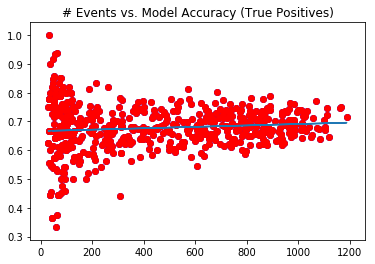

In [90]:
from scipy import stats

#fig, hist = plt.subplots(1, 2, sharex = True)
x = perf_results['num_events-R']
y = perf_results['model_score-R']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept

plt.plot(x,y,'ro', x, line)
plt.scatter(x,y, color = 'b')
#plt.hist(RHP_90d['counts'], bins, alpha = 0.5, label = 'RHP')
#plt.hist(LHP_90d['counts'], bins, alpha = 0.5, label = 'LHP')
#plt.legend(loc='upper right')
plt.title('Model Performance v. 25% Validation set: # Events vs. Model Accuracy (True Positives)')
plt.show()

In [80]:
print("slope, intercept, r_value, p_value, std_err:")
print(slope, intercept, r_value, p_value, std_err)

slope, intercept, r_value, p_value, std_err:
2.4506366821940003e-05 0.6666829051400657 0.10541862691766236 0.011425761705820704 9.657341264625997e-06


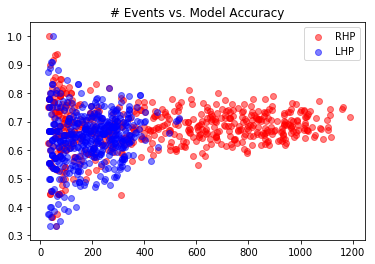

In [77]:
#fig, hist = plt.subplots(1, 2, sharex = True)
xr = perf_results['num_events-R']
yr = perf_results['model_score-R']
plt.scatter(xr,yr, color = 'red', alpha = 0.5, label = 'RHP')

xl = perf_results['num_events-L']
yl = perf_results['model_score-L']
plt.scatter(xl,yl, color = 'blue', alpha = 0.5, label = 'LHP')
plt.legend(loc='upper right')
plt.title('# Events vs. Model Accuracy')
plt.show()


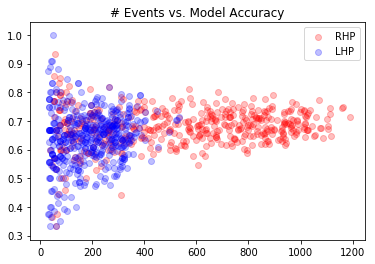

In [78]:
#fig, hist = plt.subplots(1, 2, sharex = True)
xr = filtered['num_events-R']
yr = filtered['model_score-R']
plt.scatter(xr,yr, color = 'red', alpha = 0.25, label = 'RHP')

xl = filtered['num_events-L']
yl = filtered['model_score-L']
plt.scatter(xl,yl, color = 'blue', alpha = 0.25, label = 'LHP')
plt.legend(loc='upper right')
plt.title('# Events vs. Model Accuracy')
plt.show()


#### Comments
- Model performance decreases with greater #s
- Could suggest we should process results more frequently (say, weekly), OR that we should consider other models

#### To Do
- Clean up append of record count and model performance so we get RH and LH results, separately (currently overwriting w/LH data only)
- Look at histograms of results above, to observe distribution of model performance results